In [6]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt
import geopy as gpy

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [7]:
filepath = "datasets_US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [8]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

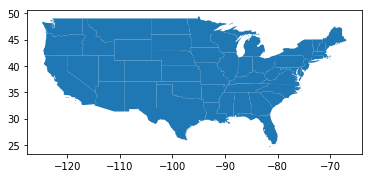

In [9]:
map48.plot()

In [10]:
filename = 'data_hurricaneKatrina2005.csv'
Katrina_df = pd.read_csv(filename, sep=',')
Katrina_df

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/23/2005 17:00,23.2,75.5,35,1007,NORTHWEST NEAR 8 MPH,Tropical Depression,TWELVE,08/23/2005 16:43,Stewart
1,1A,08/23/2005 20:00,23.3,75.8,35,1007,WEST-NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 20:03,Knabb
2,2,08/23/2005 23:00,23.4,76.0,35,1007,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/23/2005 22:52,Knabb
3,2A,08/24/2005 02:00,23.6,76.0,35,1007,NORTHWEST NEAR 5 MPH,Tropical Depression,TWELVE,08/24/2005 01:52,Beven
4,3,08/24/2005 05:00,24.0,76.4,35,1006,NORTHWEST NEAR 7 MPH,Tropical Depression,TWELVE,08/24/2005 04:34,Beven
5,3A,08/24/2005 08:00,24.4,76.6,35,1006,NORTHWEST NEAR 8 MPH,Tropical Depression,TWELVE,08/24/2005 07:58,Stewart
6,4,08/24/2005 11:00,24.7,76.7,40,1006,NORTH-NORTHWEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 10:49,Stewart
7,4A,08/24/2005 14:00,25.2,77.0,45,1003,NORTH-NORTHWEST NEAR 8 MPH,Tropical Storm,Katrina,08/24/2005 13:58,Stewart
8,5,08/24/2005 17:00,25.6,77.2,45,1002,NORTHWEST NEAR 9 MPH,Tropical Storm,Katrina,08/24/2005 16:37,Stewart
9,5A,08/24/2005 20:00,26.0,77.6,45,1001,WEST-NORTHWEST NEAR 9 MPH,Tropical Storm,Katrina,08/24/2005 19:43,Avila


In [11]:
Katrina_df['Long'] = 0 - Katrina_df['Long']

In [12]:
Katrina_df['coordinates'] = list(Katrina_df[['Long', 'Lat']].values)

In [13]:
Katrina_df['coordinates'] = Katrina_df['coordinates'].apply(Point)

In [14]:
geo_Katrina = gpd.GeoDataFrame(Katrina_df, geometry='coordinates')

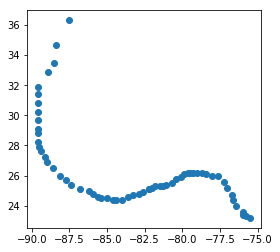

In [15]:
geo_Katrina.plot()

Text(0.5, 1.0, 'Hurricane Katrina Path')

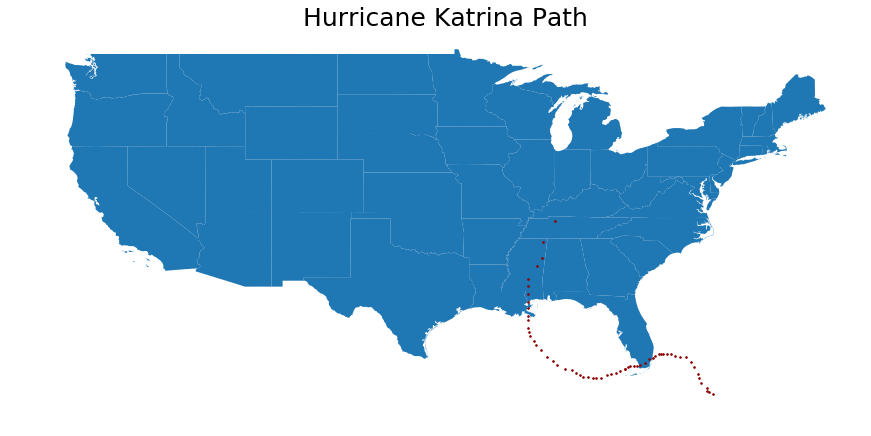

In [16]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
geo_Katrina.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Katrina Path", fontsize=25, fontweight=3)